<a href="https://colab.research.google.com/github/Paulo-tech1/Analise-Bancos-B3/blob/main/An%C3%A1lise_das_A%C3%A7%C3%B5es_dos_bancos_brasileiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise das Ações dos bancos brasileiros B3 (Bolsa de Valores do Brasil)(BBAS3, ITUB4, BBDC4)**

# Instalando e carregando as bibliotecas quantmod e TTR

In [ ]:
# Instalando e carregando as bibliotecas necessárias
install.packages("quantmod")
install.packages("TTR")
library(quantmod)
library(TTR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Definindo o ticker dos Bancos

In [ ]:
# Definindo o ticker do Banco do Brasil SA
ticker <- "BBAS3.SA"  # BBAS3.SA é o ticker para o Banco do Brasil na Bovespa

# Definindo o período desejado
start_date <- "2023-05-01"
end_date <- Sys.Date()  # Data atual

# Definindo o ticker do Itaú Unibanco SA
ticker <- "ITUB4.SA"  #ITUB4.SA é o ticker para do Itaú Unibanco na Bovespa

# Definindo o período desejado
start_date <- "2023-05-01"
end_date <- Sys.Date()  # Data atual

# Definindo o ticker do Itaú Unibanco SA
ticker <- "BBDC4.SA"  #BBDC4.SA é o ticker para do Banco Bradesco SA Preference Shares na Bovespa

# Definindo o período desejado
start_date <- "2023-05-01"
end_date <- Sys.Date()  # Data atual


# Definir os símbolos das ações

In [ ]:
# Definir os símbolos das ações
symbols <- c("BBAS3.SA", "ITUB4.SA", "BBDC4.SA")

# Obter dados para esses símbolos do Yahoo Finance
getSymbols(symbols, src = "yahoo", from = start_date, to = end_date)

# Obter os preços ajustados e remover valores ausentes
# Para BBAS3
BBAS3_adj <- na.omit(Ad(get("BBAS3.SA")))

# Para ITUB4
ITUB4_adj <- na.omit(Ad(get("ITUB4.SA")))

# Para BBDC4
BBDC4_adj <- na.omit(Ad(get("BBDC4.SA")))

# Exibir as primeiras linhas do dataframe com os preços ajustados
head(BBAS3_adj)
head(ITUB4_adj)
head(BBDC4_adj)

[1] "BBAS3.SA" "ITUB4.SA" "BBDC4.SA"

           BBAS3.SA.Adjusted
2023-05-02          19.18542
2023-05-03          19.12581
2023-05-04          19.34132
2023-05-05          19.83196
2023-05-08          19.75401
2023-05-09          19.69440

           ITUB4.SA.Adjusted
2023-05-02          22.93336
2023-05-03          22.89652
2023-05-04          23.08072
2023-05-05          23.93727
2023-05-08          24.26884
2023-05-09          24.41620

           BBDC4.SA.Adjusted
2023-05-02          12.45852
2023-05-03          12.56726
2023-05-04          12.85974
2023-05-05          13.49953
2023-05-08          14.00221
2023-05-09          13.86512

# Criando o histograma dos preços ajustados e removendo os valores ausentes

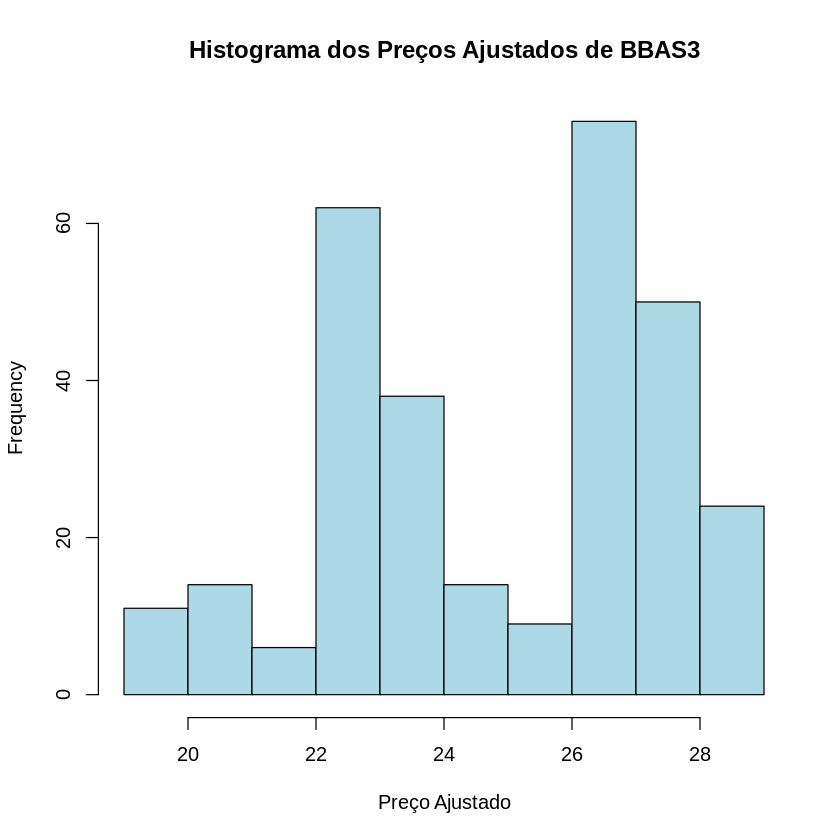

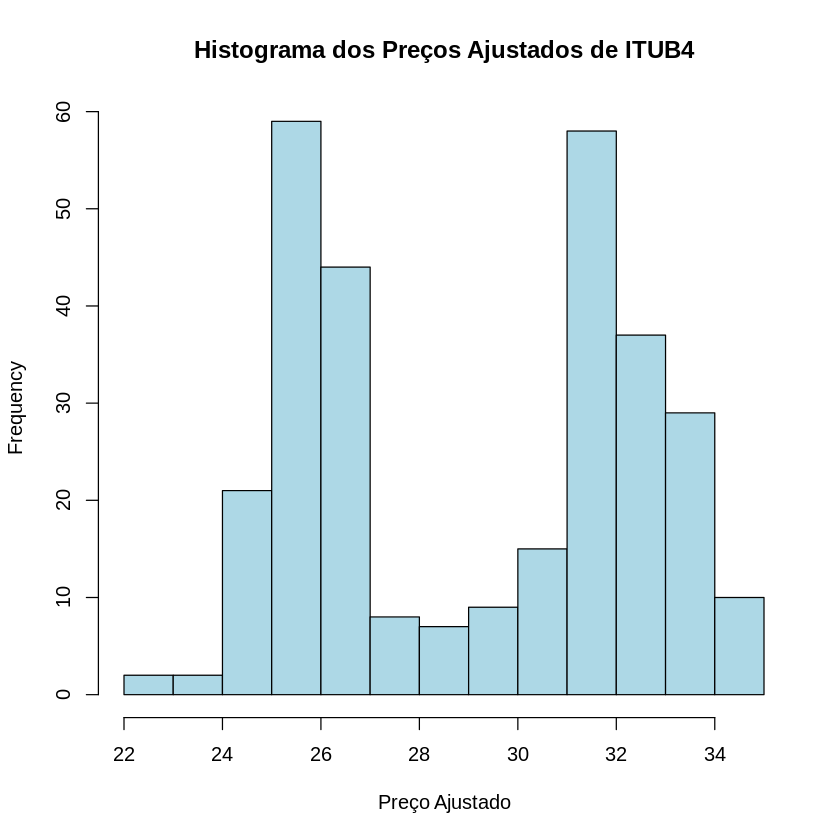

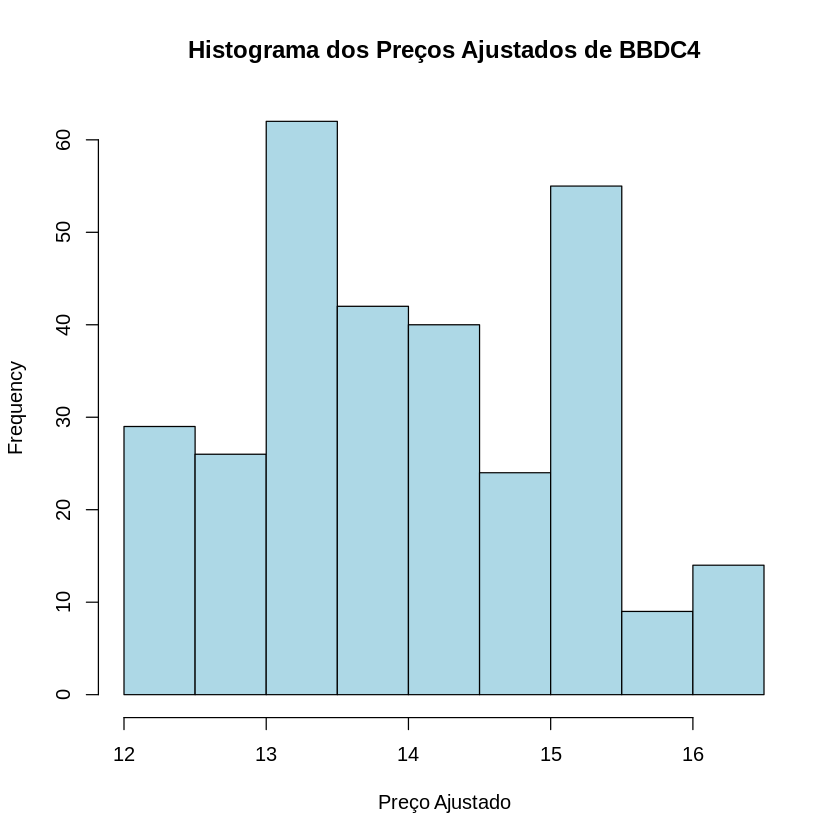

In [ ]:

# Extrair os preços ajustados e remover valores ausentes
BBAS3_adj <- na.omit(Ad(BBAS3.SA))
ITUB4_adj <- na.omit(Ad(ITUB4.SA))
BBDC4_adj <- na.omit(Ad(BBDC4.SA))

# Criar histogramas para cada ação
hist(
  BBAS3_adj,
  main = "Histograma dos Preços Ajustados de BBAS3",
  xlab = "Preço Ajustado",
  col = "lightblue"
)

hist(
  ITUB4_adj,
  main = "Histograma dos Preços Ajustados de ITUB4",
  xlab = "Preço Ajustado",
  col = "lightblue"
)

hist(
  BBDC4_adj,
  main = "Histograma dos Preços Ajustados de BBDC4",
  xlab = "Preço Ajustado",
  col = "lightblue"
)

# Criando a série temporal dos preços ajustados

[1] "BBAS3.SA" "ITUB4.SA" "BBDC4.SA"

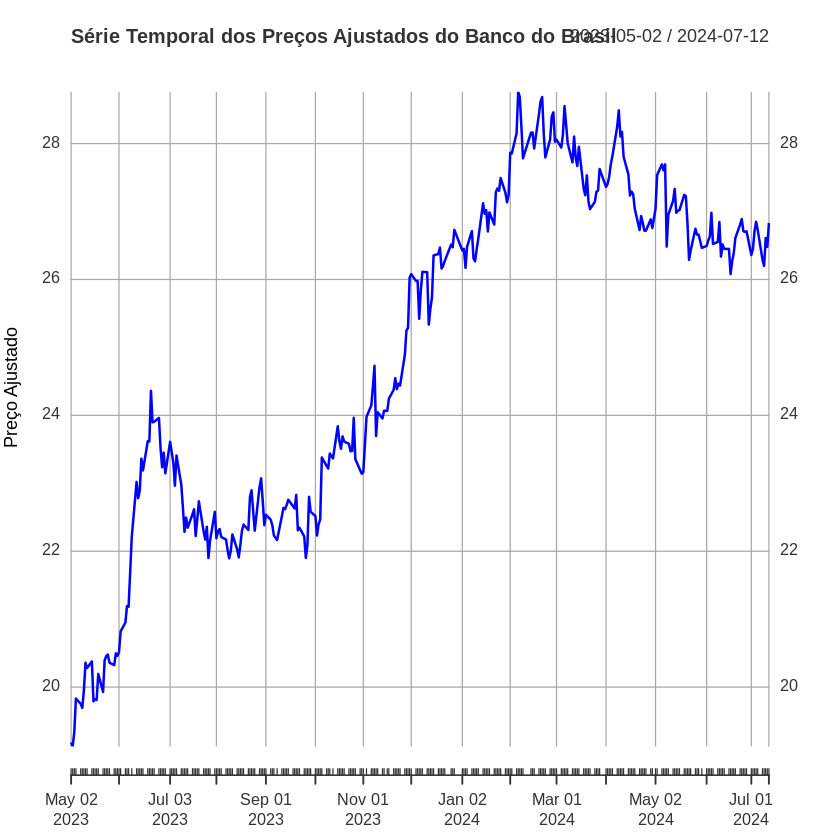

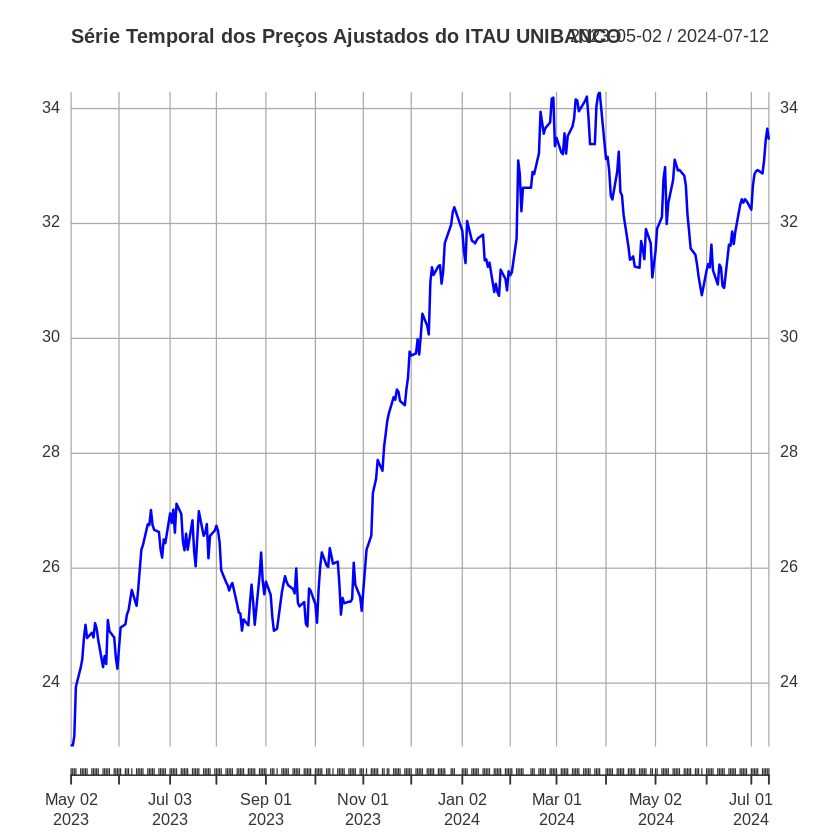

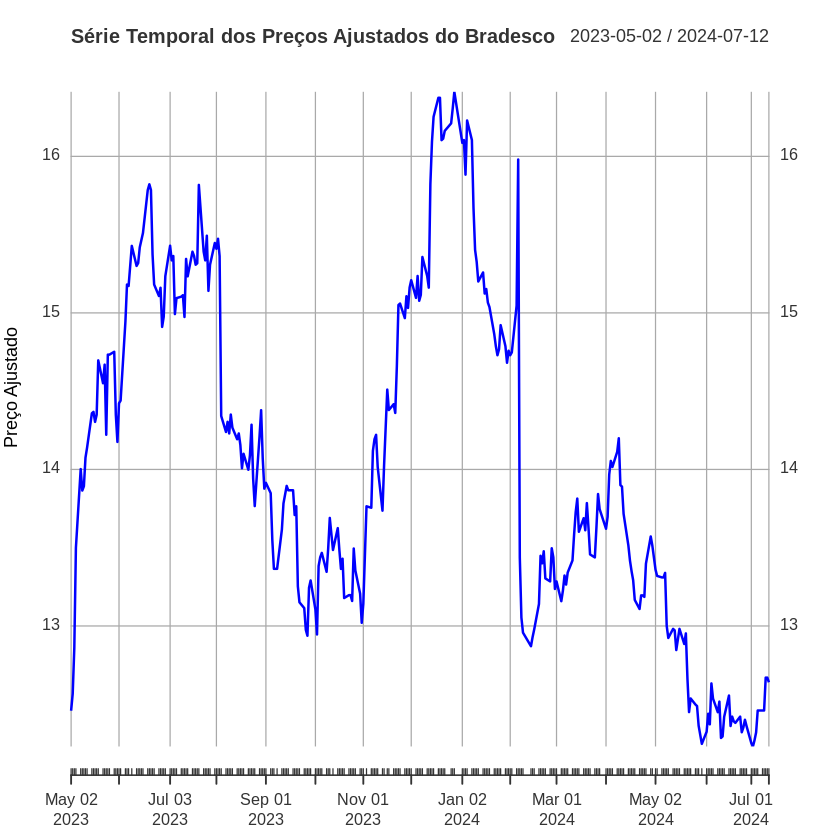

In [ ]:
# Definir os símbolos das ações
symbols <- c("BBAS3.SA", "ITUB4.SA", "BBDC4.SA")

# Obter dados para esses símbolos do Yahoo Finance
getSymbols(symbols, src = "yahoo", from = start_date, to = end_date)


# Extrair os preços ajustados e remover valores ausentes
BBAS3_adj <- na.omit(Ad(BBAS3.SA))
ITUB4_adj <- na.omit(Ad(ITUB4.SA))
BBDC4_adj <- na.omit(Ad(BBDC4.SA))

# Criar série temporal para os preços ajustados de BBAS3
plot(
  BBAS3_adj,  # Série temporal de preços ajustados
  main = "Série Temporal dos Preços Ajustados do Banco do Brasil",
  ylab = "Preço Ajustado",
  col = "blue"
)

# Criar série temporal para os preços ajustados do ITUB4
plot(
  ITUB4_adj,  # Série temporal de preços ajustados
  main = "Série Temporal dos Preços Ajustados do ITAU UNIBANCO",
  col = "blue"
)

# Criar série temporal para os preços ajustados do BBDC4
plot(
  BBDC4_adj,  # Série temporal de preços ajustados
  main = "Série Temporal dos Preços Ajustados do Bradesco ",
  ylab = "Preço Ajustado",
  col = "blue"
)

# Análise dos Momentos de Compra e Venda

In [ ]:
# Instalar e carregar o pacote quantmod (se ainda não estiver instalado)
if (!require(quantmod)) {
  install.packages("quantmod")
  library(quantmod)
} else {
  library(quantmod)
}

# Lista de tickers
tickers <- c("BBAS3.SA", "ITUB4.SA", "BBDC4.SA")

# Função para baixar e verificar dados, e extrair preços ajustados
analise_acao <- function(ticker) {
  # Baixar dados do Yahoo Finance
  getSymbols(ticker, src = "yahoo", from = "2023-01-01", to = Sys.Date())

  # Obter o objeto de dados
  dados <- get(ticker)

  # Verificar a estrutura dos dados
  print(paste("Estrutura dos dados de", ticker))
  str(dados)

  # Extrair preços ajustados
  precos_ajustados <- Cl(dados)

  # Retornar os preços ajustados
  return(precos_ajustados)
}

# Aplicar a função a cada ticker
precos_ajustados_BBAS3 <- analise_acao("BBAS3.SA")
precos_ajustados_ITUB4 <- analise_acao("ITUB4.SA")
precos_ajustados_BBDC4 <- analise_acao("BBDC4.SA")

# Verificar as primeiras linhas dos preços ajustados
print("Preços ajustados BBAS3.SA")
head(precos_ajustados_BBAS3)

print("Preços ajustados ITUB4.SA")
head(precos_ajustados_ITUB4)

print("Preços ajustados BBDC4.SA")
head(precos_ajustados_BBDC4)


[1] "Estrutura dos dados de BBAS3.SA"
An xts object on 2023-01-02 / 2024-07-12 containing: 
  Data:    double [382, 6]
  Columns: BBAS3.SA.Open, BBAS3.SA.High, BBAS3.SA.Low, BBAS3.SA.Close, BBAS3.SA.Volume ... with 1 more column
  Index:   Date [382] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-07-14 14:52:04"
[1] "Estrutura dos dados de ITUB4.SA"
An xts object on 2023-01-02 / 2024-07-12 containing: 
  Data:    double [382, 6]
  Columns: ITUB4.SA.Open, ITUB4.SA.High, ITUB4.SA.Low, ITUB4.SA.Close, ITUB4.SA.Volume ... with 1 more column
  Index:   Date [382] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-07-14 14:52:04"
[1] "Estrutura dos dados de BBDC4.SA"
An xts object on 2023-01-02 / 2024-07-12 containing: 
  Data:    double [382, 6]
  Columns: BBDC4.SA.Open, BBDC4.SA.High, BBDC4.SA.Low, BBDC4.SA.Close, BBDC4.SA.Volume ... with 1 more column
  Index:   Date [382] (TZ: "UTC")
  x

           BBAS3.SA.Close
2023-01-02         16.630
2023-01-03         16.320
2023-01-04         16.530
2023-01-05         17.285
2023-01-06         17.525
2023-01-09         17.355

[1] "Preços ajustados ITUB4.SA"


           ITUB4.SA.Close
2023-01-02          24.49
2023-01-03          23.98
2023-01-04          24.05
2023-01-05          24.80
2023-01-06          25.23
2023-01-09          25.41

[1] "Preços ajustados BBDC4.SA"


           BBDC4.SA.Close
2023-01-02          14.75
2023-01-03          14.00
2023-01-04          14.04
2023-01-05          14.65
2023-01-06          15.06
2023-01-09          14.66

# Calculando médias móveis de curto e longo prazo

In [ ]:
# Calcular as médias móveis de 20 e 50 períodos
BBAS3.SA$SMA20 <- SMA(Cl(BBAS3.SA), n = 20)
BBAS3.SA$SMA50 <- SMA(Cl(BBAS3.SA), n = 50)

ITUB4.SA$SMA20 <- SMA(Cl(ITUB4.SA), n = 20)
ITUB4.SA$SMA50 <- SMA(Cl(ITUB4.SA), n = 50)

BBDC4.SA$SMA20 <- SMA(Cl(BBDC4.SA), n = 20)
BBDC4.SA$SMA50 <- SMA(Cl(BBDC4.SA), n = 50)

# Mostrar as primeiras e as últimas linhas dos dados com médias móveis
head(BBAS3.SA)
tail(BBAS3.SA)

head(ITUB4.SA)
tail(ITUB4.SA)

head(BBDC4.SA)
tail(BBDC4.SA)


           BBAS3.SA.Open BBAS3.SA.High BBAS3.SA.Low BBAS3.SA.Close
2023-05-02        21.380        21.380       20.860         20.920
2023-05-03        21.030        21.060       20.780         20.855
2023-05-04        21.000        21.225       20.770         21.090
2023-05-05        21.095        21.655       21.095         21.625
2023-05-08        21.720        21.890       21.480         21.540
2023-05-09        21.495        21.705       21.335         21.475
           BBAS3.SA.Volume BBAS3.SA.Adjusted SMA20 SMA50
2023-05-02        25239200          19.18542    NA    NA
2023-05-03        11261800          19.12580    NA    NA
2023-05-04        14752000          19.34132    NA    NA
2023-05-05        14382200          19.83196    NA    NA
2023-05-08        16195200          19.75401    NA    NA
2023-05-09        20231600          19.69440    NA    NA

           BBAS3.SA.Open BBAS3.SA.High BBAS3.SA.Low BBAS3.SA.Close
2024-07-05         26.85         26.87        26.53          26.73
2024-07-08         26.69         26.69        26.19          26.29
2024-07-09         26.28         26.28        25.99          26.20
2024-07-10         26.32         26.62        26.24          26.61
2024-07-11         26.63         26.84        26.32          26.48
2024-07-12         26.57         26.83        26.40          26.83
           BBAS3.SA.Volume BBAS3.SA.Adjusted   SMA20   SMA50
2024-07-05        11971800             26.73 26.6575 27.2098
2024-07-08        19760700             26.29 26.6115 27.1880
2024-07-09        18032800             26.20 26.5460 27.1644
2024-07-10        20180600             26.61 26.5495 27.1456
2024-07-11        18918900             26.48 26.5375 27.1268
2024-07-12        15241100             26.83 26.5565 27.1092

           ITUB4.SA.Open ITUB4.SA.High ITUB4.SA.Low ITUB4.SA.Close
2023-05-02         25.73         25.97        24.86          24.90
2023-05-03         24.95         25.13        24.68          24.86
2023-05-04         24.99         25.28        24.52          25.06
2023-05-05         25.35         25.99        25.02          25.99
2023-05-08         26.45         26.57        25.81          26.35
2023-05-09         26.28         26.79        26.23          26.51
           ITUB4.SA.Volume ITUB4.SA.Adjusted SMA20 SMA50
2023-05-02        43660400          22.93336    NA    NA
2023-05-03        23404800          22.89652    NA    NA
2023-05-04        39720400          23.08072    NA    NA
2023-05-05        43603500          23.93727    NA    NA
2023-05-08        52814400          24.26884    NA    NA
2023-05-09        38180100          24.41620    NA    NA

           ITUB4.SA.Open ITUB4.SA.High ITUB4.SA.Low ITUB4.SA.Close
2024-07-05         33.00         33.08        32.61          32.93
2024-07-08         32.83         33.00        32.60          32.87
2024-07-09         32.74         33.10        32.55          33.10
2024-07-10         33.18         33.48        33.10          33.45
2024-07-11         33.45         33.66        33.38          33.65
2024-07-12         33.65         33.69        33.32          33.46
           ITUB4.SA.Volume ITUB4.SA.Adjusted   SMA20   SMA50
2024-07-05        16825500             32.93 32.0935 32.1818
2024-07-08        17394700             32.87 32.1770 32.2056
2024-07-09        16794100             33.10 32.2545 32.2234
2024-07-10        34365600             33.45 32.3520 32.2532
2024-07-11        19611900             33.65 32.4760 32.2990
2024-07-12        22058200             33.46 32.5920 32.3322

           BBDC4.SA.Open BBDC4.SA.High BBDC4.SA.Low BBDC4.SA.Close
2023-05-02         13.87         13.89        13.43          13.65
2023-05-03         13.55         13.83        13.36          13.75
2023-05-04         13.82         14.22        13.82          14.07
2023-05-05         14.06         14.94        13.89          14.77
2023-05-08         14.82         15.42        14.82          15.32
2023-05-09         15.18         15.62        15.09          15.17
           BBDC4.SA.Volume BBDC4.SA.Adjusted SMA20 SMA50
2023-05-02        76570500          12.45852    NA    NA
2023-05-03        37376800          12.56726    NA    NA
2023-05-04        71085400          12.85974    NA    NA
2023-05-05       113562200          13.49953    NA    NA
2023-05-08       119305500          14.00221    NA    NA
2023-05-09        63086800          13.86512    NA    NA

           BBDC4.SA.Open BBDC4.SA.High BBDC4.SA.Low BBDC4.SA.Close
2024-07-05         12.34         12.50        12.25          12.46
2024-07-08         12.41         12.61        12.38          12.46
2024-07-09         12.42         12.56        12.35          12.46
2024-07-10         12.55         12.72        12.49          12.67
2024-07-11         12.72         12.79        12.61          12.67
2024-07-12         12.68         12.68        12.58          12.64
           BBDC4.SA.Volume BBDC4.SA.Adjusted   SMA20   SMA50
2024-07-05        41410800             12.46 12.5055 12.9958
2024-07-08        33661100             12.46 12.4855 12.9718
2024-07-09        18579400             12.46 12.4620 12.9434
2024-07-10        32909900             12.67 12.4610 12.9156
2024-07-11        35308200             12.67 12.4595 12.8890
2024-07-12        28892700             12.64 12.4500 12.8650

# Gráfico  de candlestick

In [ ]:
# Verifica se os pacotes estão instalados, se não estiverem, instala e carrega
if (!require(quantmod)) {
  install.packages("quantmod")
  library(quantmod)
} else {
  library(quantmod)
}

if (!require(TTR)) {
  install.packages("TTR")
  library(TTR)
} else {
  library(TTR)
}

In [ ]:
# Lista de tickers das ações dos bancos
tickers <- c("BBAS3.SA", "ITUB4.SA", "BBDC4.SA")

# Função para baixar dados e calcular médias móveis
baixar_dados_e_calcular_mm <- function(ticker) {
  # Baixar dados do Yahoo Finance
  getSymbols(ticker, src = "yahoo", from = "2023-01-01", to = Sys.Date())

  # Obter o objeto de dados baixados
  dados <- get(ticker)

  # Calcular as médias móveis de 20 e 50 períodos
  dados$SMA20 <- SMA(Cl(dados), n = 20)
  dados$SMA50 <- SMA(Cl(dados), n = 50)

  return(dados)
}

# Baixar dados e calcular médias móveis para cada ação
dados_BBAS3 <- baixar_dados_e_calcular_mm("BBAS3.SA")
dados_ITUB4 <- baixar_dados_e_calcular_mm("ITUB4.SA")
dados_BBDC4 <- baixar_dados_e_calcular_mm("BBDC4.SA")


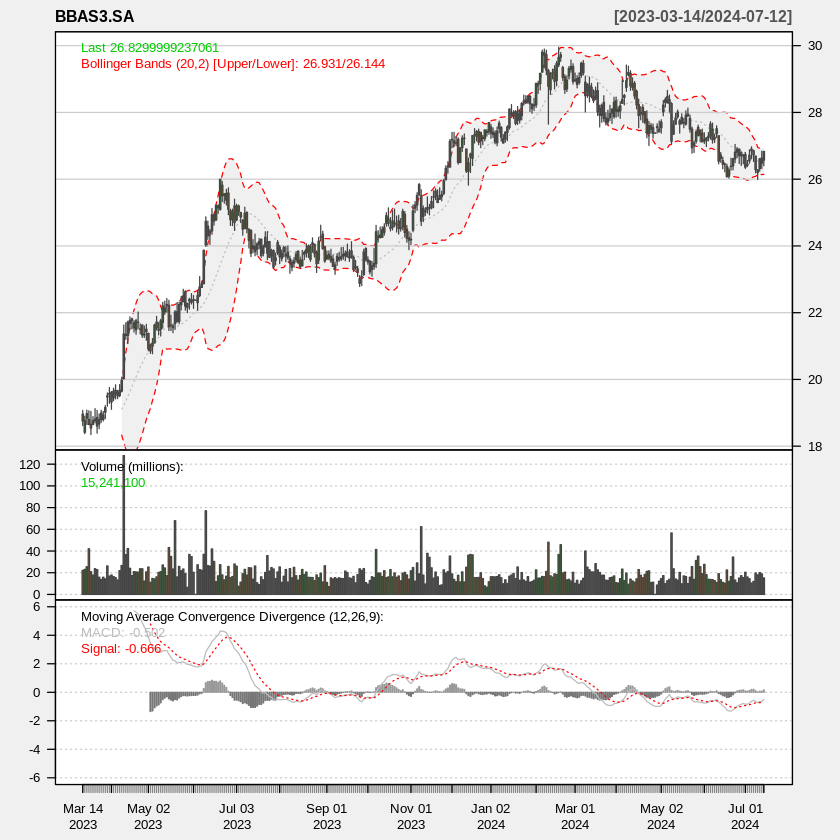

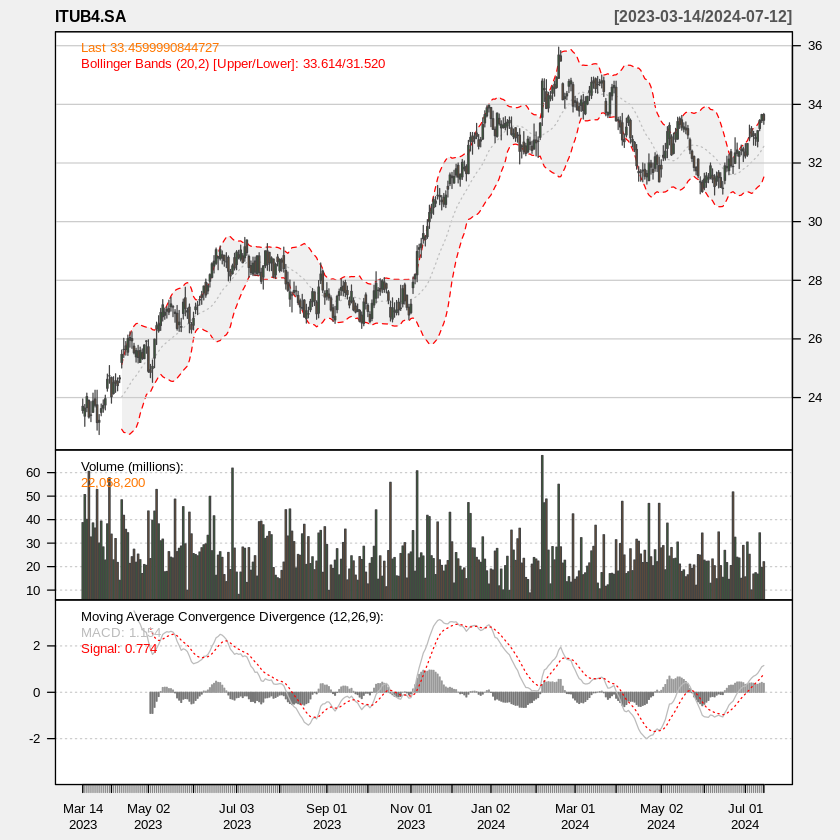

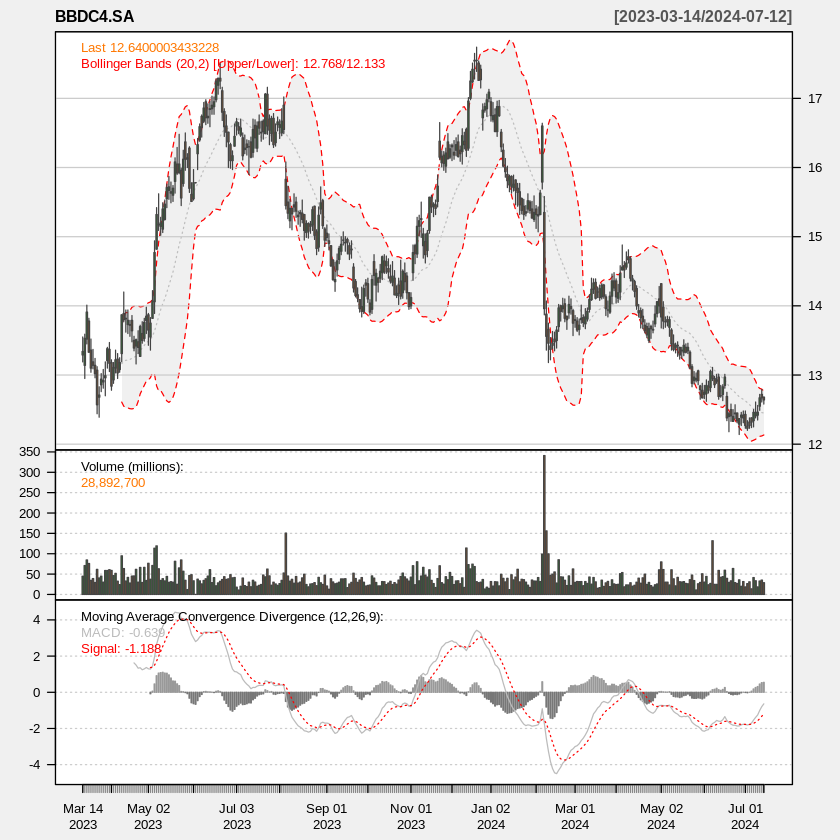

In [ ]:
# Função para plotar gráfico de candlestick com indicadores
plot_candlestick <- function(dados, ticker) {
  # Plotar gráfico de candlestick com volume, Bollinger Bands e MACD
  candleChart(dados, theme = chartTheme("white"), name = ticker,
              TA = "addVo(); addBBands(); addMACD()")

  # Adicionar médias móveis
  addSMA(n = 20, col = "blue")
  addSMA(n = 50, col = "red")

  # Calcular e adicionar linha de tendência (regressão linear)
  closing_prices <- Cl(dados)
  index <- index(closing_prices)
  trend <- lm(closing_prices ~ index)
  abline(trend, col = "green", lwd = 2)
}

# Plotar gráficos para cada ação
plot_candlestick(dados_BBAS3, "BBAS3.SA")
plot_candlestick(dados_ITUB4, "ITUB4.SA")
plot_candlestick(dados_BBDC4, "BBDC4.SA")


# Calculando os envelopes de Bollinger

In [ ]:
# Lista de tickers das ações dos bancos
tickers <- c("BBAS3.SA", "ITUB4.SA", "BBDC4.SA")

# Função para baixar dados e calcular Bandas de Bollinger
baixar_dados_e_calcular_bbands <- function(ticker) {
  # Baixar dados do Yahoo Finance
  getSymbols(ticker, src = "yahoo", from = "2023-01-01", to = Sys.Date())

  # Obter o objeto de dados baixados
  dados <- get(ticker)

  # Calcular as Bandas de Bollinger
  bbands <- BBands(Cl(dados), n = 20, maType = "SMA", sd = 2)

  # Adicionar as Bandas de Bollinger ao data frame original
  dados$BBup <- bbands$up
  dados$BBdn <- bbands$dn
  dados$BBmavg <- bbands$mavg

  return(dados)
}

# Baixar dados e calcular Bandas de Bollinger para cada ação
dados_BBAS3 <- baixar_dados_e_calcular_bbands("BBAS3.SA")
dados_ITUB4 <- baixar_dados_e_calcular_bbands("ITUB4.SA")
dados_BBDC4 <- baixar_dados_e_calcular_bbands("BBDC4.SA")


In [ ]:
# Lista de tickers das ações dos bancos
tickers <- c("BBAS3.SA", "ITUB4.SA", "BBDC4.SA")

# Função para baixar dados e calcular Bandas de Bollinger
baixar_dados_e_calcular_bbands <- function(ticker) {
  # Baixar dados do Yahoo Finance
  getSymbols(ticker, src = "yahoo", from = "2023-01-01", to = Sys.Date())

  # Obter o objeto de dados baixados
  dados <- get(ticker)

  # Calcular as Bandas de Bollinger
  bbands <- BBands(Cl(dados), n = 20, maType = "SMA", sd = 2)

  # Adicionar as Bandas de Bollinger ao data frame original
  dados$BBup <- bbands$up
  dados$BBdn <- bbands$dn
  dados$BBmavg <- bbands$mavg

  return(dados)
}

# Baixar dados e calcular Bandas de Bollinger para cada ação
dados_BBAS3 <- baixar_dados_e_calcular_bbands("BBAS3.SA")
dados_ITUB4 <- baixar_dados_e_calcular_bbands("ITUB4.SA")
dados_BBDC4 <- baixar_dados_e_calcular_bbands("BBDC4.SA")

# Mostrar primeiras e últimas linhas dos dados com Bandas de Bollinger
head(dados_BBAS3)
tail(dados_BBAS3)

head(dados_ITUB4)
tail(dados_ITUB4)

head(dados_BBDC4)
tail(dados_BBDC4)


           BBAS3.SA.Open BBAS3.SA.High BBAS3.SA.Low BBAS3.SA.Close
2023-01-02        17.110        17.110        16.45         16.630
2023-01-03        16.630        16.700        16.21         16.320
2023-01-04        16.415        16.630        16.28         16.530
2023-01-05        16.645        17.370        16.54         17.285
2023-01-06        17.325        17.635        17.22         17.525
2023-01-09        17.365        17.525        17.24         17.355
           BBAS3.SA.Volume BBAS3.SA.Adjusted BBup BBdn BBmavg
2023-01-02        23557000          14.81361   NA   NA     NA
2023-01-03        21547400          14.53747   NA   NA     NA
2023-01-04        19519000          14.72453   NA   NA     NA
2023-01-05        33937600          15.39707   NA   NA     NA
2023-01-06        29504600          15.61085   NA   NA     NA
2023-01-09        20027200          15.45942   NA   NA     NA

           BBAS3.SA.Open BBAS3.SA.High BBAS3.SA.Low BBAS3.SA.Close
2024-07-05         26.85         26.87        26.53          26.73
2024-07-08         26.69         26.69        26.19          26.29
2024-07-09         26.28         26.28        25.99          26.20
2024-07-10         26.32         26.62        26.24          26.61
2024-07-11         26.63         26.84        26.32          26.48
2024-07-12         26.57         26.83        26.40          26.83
           BBAS3.SA.Volume BBAS3.SA.Adjusted     BBup     BBdn  BBmavg
2024-07-05        11971800             26.73 27.28273 26.03227 26.6575
2024-07-08        19760700             26.29 27.20176 26.02124 26.6115
2024-07-09        18032800             26.20 26.99728 26.09472 26.5460
2024-07-10        20180600             26.61 27.00163 26.09737 26.5495
2024-07-11        18918900             26.48 26.98359 26.09141 26.5375
2024-07-12        15241100             26.83 27.01816 26.09484 26.5565

           ITUB4.SA.Open ITUB4.SA.High ITUB4.SA.Low ITUB4.SA.Close
2023-01-02         24.43         24.53        24.04          24.49
2023-01-03         24.49         24.65        23.83          23.98
2023-01-04         24.06         24.52        23.88          24.05
2023-01-05         24.10         24.91        24.02          24.80
2023-01-06         24.93         25.31        24.80          25.23
2023-01-09         25.00         25.66        24.89          25.41
           ITUB4.SA.Volume ITUB4.SA.Adjusted BBup BBdn BBmavg
2023-01-02        23340700          22.23842   NA   NA     NA
2023-01-03        29873800          21.77531   NA   NA     NA
2023-01-04        29881500          21.83887   NA   NA     NA
2023-01-05        36322800          22.51992   NA   NA     NA
2023-01-06        37628200          22.91039   NA   NA     NA
2023-01-09        25669400          23.07384   NA   NA     NA

           ITUB4.SA.Open ITUB4.SA.High ITUB4.SA.Low ITUB4.SA.Close
2024-07-05         33.00         33.08        32.61          32.93
2024-07-08         32.83         33.00        32.60          32.87
2024-07-09         32.74         33.10        32.55          33.10
2024-07-10         33.18         33.48        33.10          33.45
2024-07-11         33.45         33.66        33.38          33.65
2024-07-12         33.65         33.69        33.32          33.46
           ITUB4.SA.Volume ITUB4.SA.Adjusted     BBup     BBdn  BBmavg
2024-07-05        16825500             32.93 33.20265 30.98435 32.0935
2024-07-08        17394700             32.87 33.25554 31.09846 32.1770
2024-07-09        16794100             33.10 33.36399 31.14501 32.2545
2024-07-10        34365600             33.45 33.52031 31.18369 32.3520
2024-07-11        19611900             33.65 33.64261 31.30939 32.4760
2024-07-12        22058200             33.46 33.66150 31.52250 32.5920

           BBDC4.SA.Open BBDC4.SA.High BBDC4.SA.Low BBDC4.SA.Close
2023-01-02         14.90         14.99        14.66          14.75
2023-01-03         14.76         14.78        13.95          14.00
2023-01-04         14.15         14.23        13.66          14.04
2023-01-05         14.11         14.71        14.07          14.65
2023-01-06         14.66         15.08        14.50          15.06
2023-01-09         14.31         14.74        14.21          14.66
           BBDC4.SA.Volume BBDC4.SA.Adjusted BBup BBdn BBmavg
2023-01-02        24748300          12.86859   NA   NA     NA
2023-01-03       127764400          12.22999   NA   NA     NA
2023-01-04       153235200          12.26493   NA   NA     NA
2023-01-05       164949200          12.79781   NA   NA     NA
2023-01-06        86788300          13.15597   NA   NA     NA
2023-01-09        73674800          13.32265   NA   NA     NA

           BBDC4.SA.Open BBDC4.SA.High BBDC4.SA.Low BBDC4.SA.Close
2024-07-05         12.34         12.50        12.25          12.46
2024-07-08         12.41         12.61        12.38          12.46
2024-07-09         12.42         12.56        12.35          12.46
2024-07-10         12.55         12.72        12.49          12.67
2024-07-11         12.72         12.79        12.61          12.67
2024-07-12         12.68         12.68        12.58          12.64
           BBDC4.SA.Volume BBDC4.SA.Adjusted     BBup     BBdn  BBmavg
2024-07-05        41410800             12.46 12.96058 12.05042 12.5055
2024-07-08        33661100             12.46 12.91068 12.06032 12.4855
2024-07-09        18579400             12.46 12.83507 12.08893 12.4620
2024-07-10        32909900             12.67 12.83172 12.09028 12.4610
2024-07-11        35308200             12.67 12.82657 12.09243 12.4595
2024-07-12        28892700             12.64 12.78681 12.11319 12.4500

# Plotando os preços ajustados com médias móveis e envelopes de Bollinger

[1] "BBAS3.SA"

           BBAS3.SA.Open BBAS3.SA.High BBAS3.SA.Low BBAS3.SA.Close
2023-01-02        17.110        17.110        16.45         16.630
2023-01-03        16.630        16.700        16.21         16.320
2023-01-04        16.415        16.630        16.28         16.530
2023-01-05        16.645        17.370        16.54         17.285
2023-01-06        17.325        17.635        17.22         17.525
2023-01-09        17.365        17.525        17.24         17.355
           BBAS3.SA.Volume BBAS3.SA.Adjusted SMA.20
2023-01-02        23557000          14.81360     NA
2023-01-03        21547400          14.53747     NA
2023-01-04        19519000          14.72453     NA
2023-01-05        33937600          15.39707     NA
2023-01-06        29504600          15.61085     NA
2023-01-09        20027200          15.45942     NA

           BBAS3.SA.Open BBAS3.SA.High BBAS3.SA.Low BBAS3.SA.Close
2024-07-05         26.85         26.87        26.53          26.73
2024-07-08         26.69         26.69        26.19          26.29
2024-07-09         26.28         26.28        25.99          26.20
2024-07-10         26.32         26.62        26.24          26.61
2024-07-11         26.63         26.84        26.32          26.48
2024-07-12         26.57         26.83        26.40          26.83
           BBAS3.SA.Volume BBAS3.SA.Adjusted  SMA.20
2024-07-05        11971800             26.73 26.6575
2024-07-08        19760700             26.29 26.6115
2024-07-09        18032800             26.20 26.5460
2024-07-10        20180600             26.61 26.5495
2024-07-11        18918900             26.48 26.5375
2024-07-12        15241100             26.83 26.5565

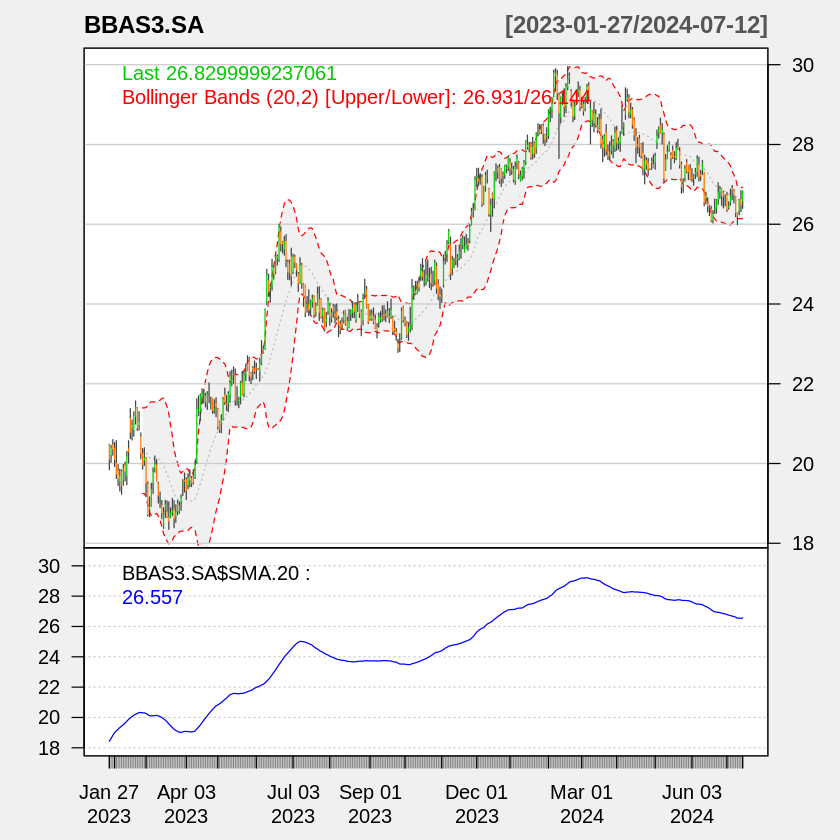

In [ ]:
# Baixar dados do Yahoo Finance
getSymbols("BBAS3.SA", src = "yahoo", from = "2023-01-01", to = Sys.Date())

# Calcular a média móvel de 20 períodos
BBAS3.SA$SMA.20 <- SMA(Cl(BBAS3.SA), n = 20)

# Verificar se os dados foram carregados corretamente
head(BBAS3.SA)
tail(BBAS3.SA)

# Plotar os preços ajustados, média móvel de 20 períodos e Bandas de Bollinger
chartSeries(BBAS3.SA, theme = chartTheme("white"),
            TA = c(addTA(BBAS3.SA$SMA.20, col = "blue"),
                   addBBands()))


[1] "ITUB4.SA"

           ITUB4.SA.Open ITUB4.SA.High ITUB4.SA.Low ITUB4.SA.Close
2023-01-02         24.43         24.53        24.04          24.49
2023-01-03         24.49         24.65        23.83          23.98
2023-01-04         24.06         24.52        23.88          24.05
2023-01-05         24.10         24.91        24.02          24.80
2023-01-06         24.93         25.31        24.80          25.23
2023-01-09         25.00         25.66        24.89          25.41
           ITUB4.SA.Volume ITUB4.SA.Adjusted SMA.20
2023-01-02        23340700          22.23842     NA
2023-01-03        29873800          21.77531     NA
2023-01-04        29881500          21.83888     NA
2023-01-05        36322800          22.51992     NA
2023-01-06        37628200          22.91039     NA
2023-01-09        25669400          23.07384     NA

           ITUB4.SA.Open ITUB4.SA.High ITUB4.SA.Low ITUB4.SA.Close
2024-07-05         33.00         33.08        32.61          32.93
2024-07-08         32.83         33.00        32.60          32.87
2024-07-09         32.74         33.10        32.55          33.10
2024-07-10         33.18         33.48        33.10          33.45
2024-07-11         33.45         33.66        33.38          33.65
2024-07-12         33.65         33.69        33.32          33.46
           ITUB4.SA.Volume ITUB4.SA.Adjusted  SMA.20
2024-07-05        16825500             32.93 32.0935
2024-07-08        17394700             32.87 32.1770
2024-07-09        16794100             33.10 32.2545
2024-07-10        34365600             33.45 32.3520
2024-07-11        19611900             33.65 32.4760
2024-07-12        22058200             33.46 32.5920

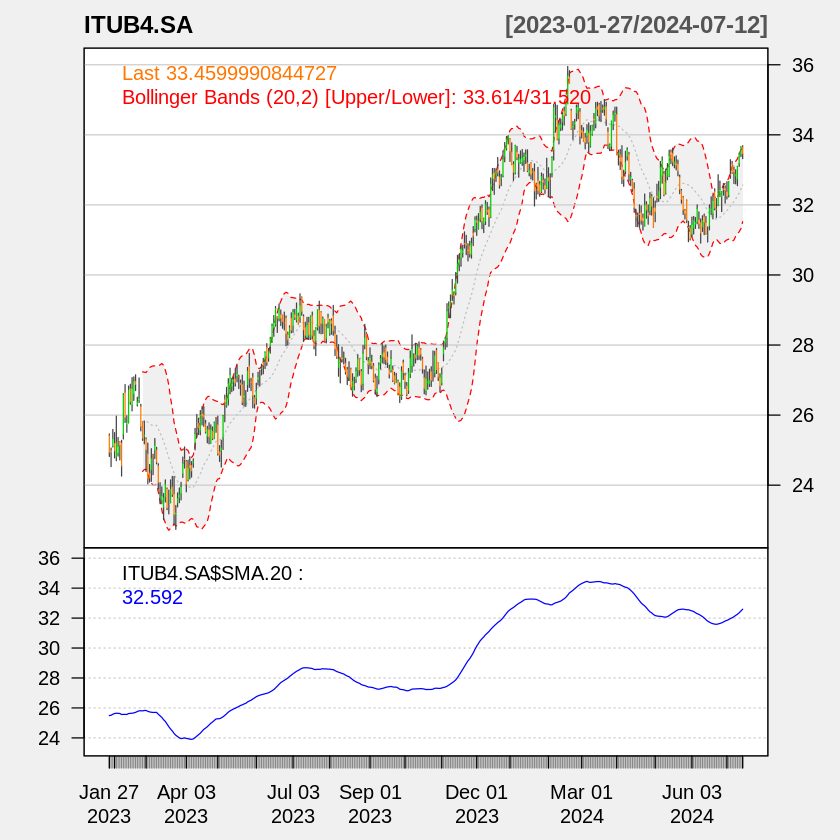

In [ ]:
# Baixar dados do Yahoo Finance
getSymbols("ITUB4.SA", src = "yahoo", from = "2023-01-01", to = Sys.Date())

# Calcular a média móvel de 20 períodos
ITUB4.SA$SMA.20 <- SMA(Cl(ITUB4.SA), n = 20)

# Verificar se os dados foram carregados corretamente
head(ITUB4.SA)
tail(ITUB4.SA)

# Plotar os preços ajustados, média móvel de 20 períodos e Bandas de Bollinger
chartSeries(ITUB4.SA, theme = chartTheme("white"),
            TA = c(addTA(ITUB4.SA$SMA.20, col = "blue"),
                   addBBands()))

[1] "BBDC4.SA"

           BBDC4.SA.Open BBDC4.SA.High BBDC4.SA.Low BBDC4.SA.Close
2023-01-02         14.90         14.99        14.66          14.75
2023-01-03         14.76         14.78        13.95          14.00
2023-01-04         14.15         14.23        13.66          14.04
2023-01-05         14.11         14.71        14.07          14.65
2023-01-06         14.66         15.08        14.50          15.06
2023-01-09         14.31         14.74        14.21          14.66
           BBDC4.SA.Volume BBDC4.SA.Adjusted SMA.20
2023-01-02        24748300          12.86859     NA
2023-01-03       127764400          12.22999     NA
2023-01-04       153235200          12.26493     NA
2023-01-05       164949200          12.79781     NA
2023-01-06        86788300          13.15597     NA
2023-01-09        73674800          13.32265     NA

           BBDC4.SA.Open BBDC4.SA.High BBDC4.SA.Low BBDC4.SA.Close
2024-07-05         12.34         12.50        12.25          12.46
2024-07-08         12.41         12.61        12.38          12.46
2024-07-09         12.42         12.56        12.35          12.46
2024-07-10         12.55         12.72        12.49          12.67
2024-07-11         12.72         12.79        12.61          12.67
2024-07-12         12.68         12.68        12.58          12.64
           BBDC4.SA.Volume BBDC4.SA.Adjusted  SMA.20
2024-07-05        41410800             12.46 12.5055
2024-07-08        33661100             12.46 12.4855
2024-07-09        18579400             12.46 12.4620
2024-07-10        32909900             12.67 12.4610
2024-07-11        35308200             12.67 12.4595
2024-07-12        28892700             12.64 12.4500

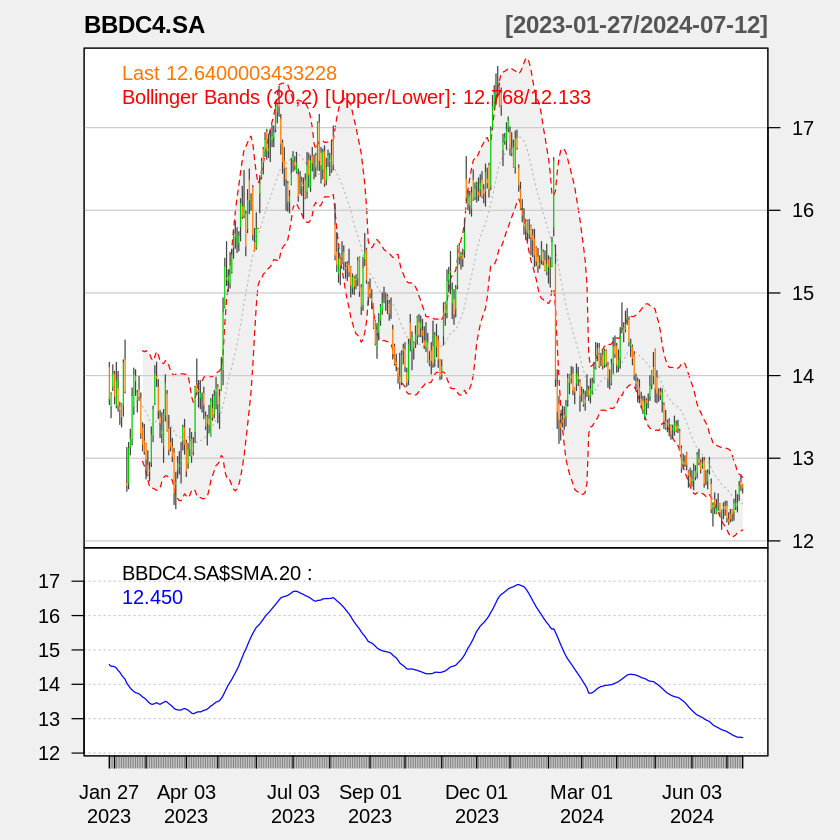

In [ ]:
# Baixar dados do Yahoo Finance
getSymbols("BBDC4.SA", src = "yahoo", from = "2023-01-01", to = Sys.Date())

# Calcular a média móvel de 20 períodos
BBDC4.SA$SMA.20 <- SMA(Cl(BBDC4.SA), n = 20)

# Verificar se os dados foram carregados corretamente
head(BBDC4.SA)
tail(BBDC4.SA)

# Plotar os preços ajustados, média móvel de 20 períodos e Bandas de Bollinger
chartSeries(BBDC4.SA, theme = chartTheme("white"),
            TA = c(addTA(BBDC4.SA$SMA.20, col = "blue"),
                   addBBands()))

# Adicionando sugestões de compra e venda

[1] "ITUB4.SA"

           ITUB4.SA.Open ITUB4.SA.High ITUB4.SA.Low ITUB4.SA.Close
2023-05-02         25.73         25.97        24.86          24.90
2023-05-03         24.95         25.13        24.68          24.86
2023-05-04         24.99         25.28        24.52          25.06
2023-05-05         25.35         25.99        25.02          25.99
2023-05-08         26.45         26.57        25.81          26.35
2023-05-09         26.28         26.79        26.23          26.51
           ITUB4.SA.Volume ITUB4.SA.Adjusted SMA20 SMA50 BBup BBdn BBmavg
2023-05-02        43660400          22.93336    NA    NA   NA   NA     NA
2023-05-03        23404800          22.89652    NA    NA   NA   NA     NA
2023-05-04        39720400          23.08072    NA    NA   NA   NA     NA
2023-05-05        43603500          23.93727    NA    NA   NA   NA     NA
2023-05-08        52814400          24.26884    NA    NA   NA   NA     NA
2023-05-09        38180100          24.41620    NA    NA   NA   NA     NA

           ITUB4.SA.Open ITUB4.SA.High ITUB4.SA.Low ITUB4.SA.Close
2024-07-05         33.00         33.08        32.61          32.93
2024-07-08         32.83         33.00        32.60          32.87
2024-07-09         32.74         33.10        32.55          33.10
2024-07-10         33.18         33.48        33.10          33.45
2024-07-11         33.45         33.66        33.38          33.65
2024-07-12         33.65         33.69        33.32          33.46
           ITUB4.SA.Volume ITUB4.SA.Adjusted   SMA20   SMA50     BBup     BBdn
2024-07-05        16825500             32.93 32.0935 32.1818 33.20265 30.98435
2024-07-08        17394700             32.87 32.1770 32.2056 33.25554 31.09846
2024-07-09        16794100             33.10 32.2545 32.2234 33.36399 31.14501
2024-07-10        34365600             33.45 32.3520 32.2532 33.52031 31.18369
2024-07-11        19611900             33.65 32.4760 32.2990 33.64261 31.30939
2024-07-12        22058200             33.46 32.5920 32.3

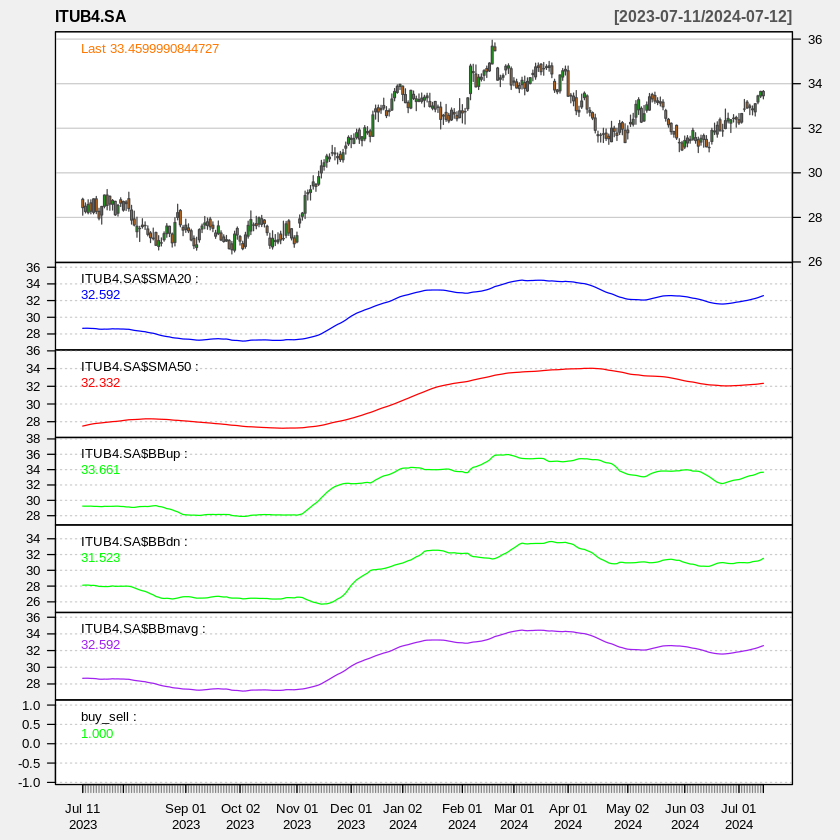

In [ ]:
# Obter dados da ITUB4.SA do Yahoo Finance para o período de 2023-01-01 até a data atual
getSymbols("ITUB4.SA", src = "yahoo", from = "2023-05-01", to = Sys.Date())

# Calcular as médias móveis de 20 e 50 períodos usando os preços de fechamento ajustados
ITUB4.SA$SMA20 <- SMA(Cl(ITUB4.SA), n = 20)
ITUB4.SA$SMA50 <- SMA(Cl(ITUB4.SA), n = 50)

# Calcular as Bandas de Bollinger usando os preços de fechamento ajustados
bbands <- BBands(Cl(ITUB4.SA), n = 20, maType = "SMA", sd = 2)

# Adicionar as Bandas de Bollinger ao data frame original
ITUB4.SA$BBup <- bbands$up
ITUB4.SA$BBdn <- bbands$dn
ITUB4.SA$BBmavg <- bbands$mavg

# Adicionando sugestões de compra e venda
# Se o preço cruzar acima da média móvel de 20 períodos e estiver abaixo da banda superior de Bollinger, é um sinal de compra
# Se o preço cruzar abaixo da média móvel de 20 períodos e estiver acima da banda inferior de Bollinger, é um sinal de venda
precos_ajustados <- Cl(ITUB4.SA)
signals <- rep(NA, length(precos_ajustados))
signals[precos_ajustados > ITUB4.SA$SMA20 & precos_ajustados < ITUB4.SA$BBup] <- 1  # Compra
signals[precos_ajustados < ITUB4.SA$SMA20 & precos_ajustados > ITUB4.SA$BBdn] <- -1  # Venda

# Criar um objeto de dados temporais correspondente aos momentos de compra e venda
buy_sell <- xts(rep(NA, length(precos_ajustados)), index(precos_ajustados))
buy_sell[signals == 1] <- 1  # Momentos de compra
buy_sell[signals == -1] <- -1  # Momentos de venda

# Plotar os preços ajustados, médias móveis e Bandas de Bollinger
chartSeries(ITUB4.SA, theme = chartTheme("white"),
            TA = c(addTA(ITUB4.SA$SMA20, col = "blue"),
                   addTA(ITUB4.SA$SMA50, col = "red"),
                   addTA(ITUB4.SA$BBup, col = "green"),
                   addTA(ITUB4.SA$BBdn, col = "green"),
                   addTA(ITUB4.SA$BBmavg, col = "purple"),
                   addTA(buy_sell, type = "p", col = ifelse(buy_sell == 1, "green", "red"), pch = 18)))

# Mostrar as primeiras e as últimas linhas dos dados com médias móveis e Bandas de Bollinger
head(ITUB4.SA)
tail(ITUB4.SA)


[1] "BBAS3.SA"

           BBAS3.SA.Open BBAS3.SA.High BBAS3.SA.Low BBAS3.SA.Close
2023-05-02        21.380        21.380       20.860         20.920
2023-05-03        21.030        21.060       20.780         20.855
2023-05-04        21.000        21.225       20.770         21.090
2023-05-05        21.095        21.655       21.095         21.625
2023-05-08        21.720        21.890       21.480         21.540
2023-05-09        21.495        21.705       21.335         21.475
           BBAS3.SA.Volume BBAS3.SA.Adjusted SMA20 SMA50 BBup BBdn BBmavg
2023-05-02        25239200          19.18542    NA    NA   NA   NA     NA
2023-05-03        11261800          19.12580    NA    NA   NA   NA     NA
2023-05-04        14752000          19.34132    NA    NA   NA   NA     NA
2023-05-05        14382200          19.83196    NA    NA   NA   NA     NA
2023-05-08        16195200          19.75401    NA    NA   NA   NA     NA
2023-05-09        20231600          19.69440    NA    NA   NA   NA     NA

           BBAS3.SA.Open BBAS3.SA.High BBAS3.SA.Low BBAS3.SA.Close
2024-07-05         26.85         26.87        26.53          26.73
2024-07-08         26.69         26.69        26.19          26.29
2024-07-09         26.28         26.28        25.99          26.20
2024-07-10         26.32         26.62        26.24          26.61
2024-07-11         26.63         26.84        26.32          26.48
2024-07-12         26.57         26.83        26.40          26.83
           BBAS3.SA.Volume BBAS3.SA.Adjusted   SMA20   SMA50     BBup     BBdn
2024-07-05        11971800             26.73 26.6575 27.2098 27.28273 26.03227
2024-07-08        19760700             26.29 26.6115 27.1880 27.20176 26.02124
2024-07-09        18032800             26.20 26.5460 27.1644 26.99728 26.09472
2024-07-10        20180600             26.61 26.5495 27.1456 27.00163 26.09737
2024-07-11        18918900             26.48 26.5375 27.1268 26.98359 26.09141
2024-07-12        15241100             26.83 26.5565 27.1

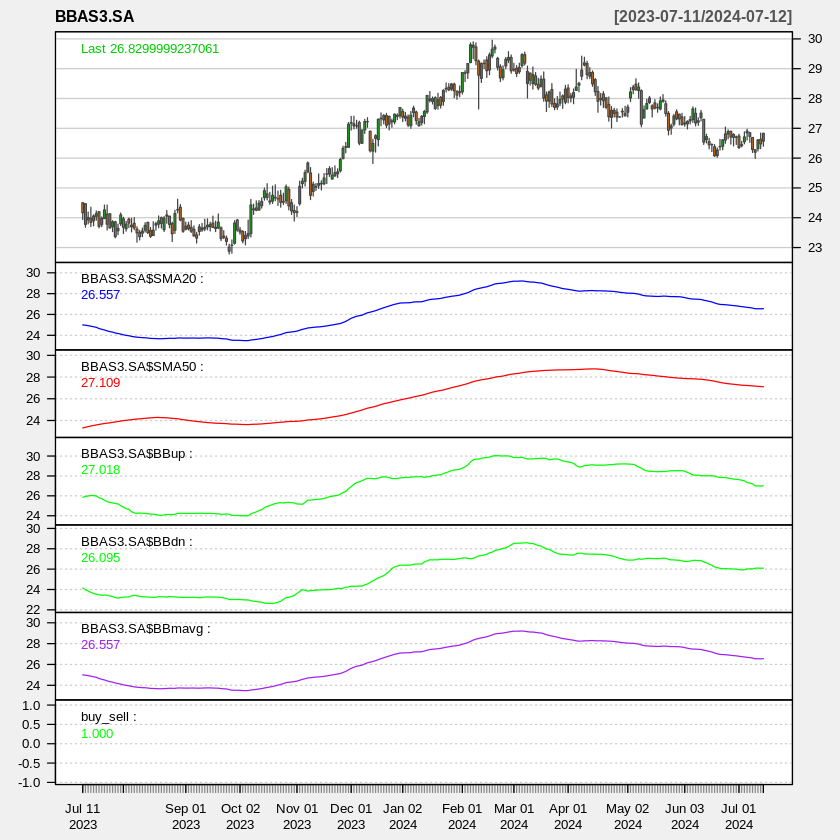

In [ ]:
# Obter dados da BBAS3.SA do Yahoo Finance para o período de 2023-01-01 até a data atual
getSymbols("BBAS3.SA", src = "yahoo", from = "2023-05-01", to = Sys.Date())

# Calcular as médias móveis de 20 e 50 períodos usando os preços de fechamento ajustados
BBAS3.SA$SMA20 <- SMA(Cl(BBAS3.SA), n = 20)
BBAS3.SA$SMA50 <- SMA(Cl(BBAS3.SA), n = 50)

# Calcular as Bandas de Bollinger usando os preços de fechamento ajustados
bbands <- BBands(Cl(BBAS3.SA), n = 20, maType = "SMA", sd = 2)

# Adicionar as Bandas de Bollinger ao data frame original
BBAS3.SA$BBup <- bbands$up
BBAS3.SA$BBdn <- bbands$dn
BBAS3.SA$BBmavg <- bbands$mavg

# Adicionando sugestões de compra e venda
# Se o preço cruzar acima da média móvel de 20 períodos e estiver abaixo da banda superior de Bollinger, é um sinal de compra
# Se o preço cruzar abaixo da média móvel de 20 períodos e estiver acima da banda inferior de Bollinger, é um sinal de venda
precos_ajustados <- Cl(BBAS3.SA)
signals <- rep(NA, length(precos_ajustados))
signals[precos_ajustados > BBAS3.SA$SMA20 & precos_ajustados < BBAS3.SA$BBup] <- 1  # Compra
signals[precos_ajustados < BBAS3.SA$SMA20 & precos_ajustados > BBAS3.SA$BBdn] <- -1  # Venda

# Criar um objeto de dados temporais correspondente aos momentos de compra e venda
buy_sell <- xts(rep(NA, length(precos_ajustados)), index(precos_ajustados))
buy_sell[signals == 1] <- 1  # Momentos de compra
buy_sell[signals == -1] <- -1  # Momentos de venda

# Plotar os preços ajustados, médias móveis e Bandas de Bollinger
chartSeries(BBAS3.SA, theme = chartTheme("white"),
            TA = c(addTA(BBAS3.SA$SMA20, col = "blue"),
                   addTA(BBAS3.SA$SMA50, col = "red"),
                   addTA(BBAS3.SA$BBup, col = "green"),
                   addTA(BBAS3.SA$BBdn, col = "green"),
                   addTA(BBAS3.SA$BBmavg, col = "purple"),
                   addTA(buy_sell, type = "p", col = ifelse(buy_sell == 1, "green", "red"), pch = 18)))

# Mostrar as primeiras e as últimas linhas dos dados com médias móveis e Bandas de Bollinger
head(BBAS3.SA)
tail(BBAS3.SA)


[1] "BBDC4.SA"

           BBDC4.SA.Open BBDC4.SA.High BBDC4.SA.Low BBDC4.SA.Close
2023-05-02         13.87         13.89        13.43          13.65
2023-05-03         13.55         13.83        13.36          13.75
2023-05-04         13.82         14.22        13.82          14.07
2023-05-05         14.06         14.94        13.89          14.77
2023-05-08         14.82         15.42        14.82          15.32
2023-05-09         15.18         15.62        15.09          15.17
           BBDC4.SA.Volume BBDC4.SA.Adjusted SMA20 SMA50 BBup BBdn BBmavg
2023-05-02        76570500          12.45852    NA    NA   NA   NA     NA
2023-05-03        37376800          12.56726    NA    NA   NA   NA     NA
2023-05-04        71085400          12.85974    NA    NA   NA   NA     NA
2023-05-05       113562200          13.49953    NA    NA   NA   NA     NA
2023-05-08       119305500          14.00222    NA    NA   NA   NA     NA
2023-05-09        63086800          13.86512    NA    NA   NA   NA     NA

           BBDC4.SA.Open BBDC4.SA.High BBDC4.SA.Low BBDC4.SA.Close
2024-07-05         12.34         12.50        12.25          12.46
2024-07-08         12.41         12.61        12.38          12.46
2024-07-09         12.42         12.56        12.35          12.46
2024-07-10         12.55         12.72        12.49          12.67
2024-07-11         12.72         12.79        12.61          12.67
2024-07-12         12.68         12.68        12.58          12.64
           BBDC4.SA.Volume BBDC4.SA.Adjusted   SMA20   SMA50     BBup     BBdn
2024-07-05        41410800             12.46 12.5055 12.9958 12.96058 12.05042
2024-07-08        33661100             12.46 12.4855 12.9718 12.91068 12.06032
2024-07-09        18579400             12.46 12.4620 12.9434 12.83507 12.08893
2024-07-10        32909900             12.67 12.4610 12.9156 12.83172 12.09028
2024-07-11        35308200             12.67 12.4595 12.8890 12.82657 12.09243
2024-07-12        28892700             12.64 12.4500 12.8

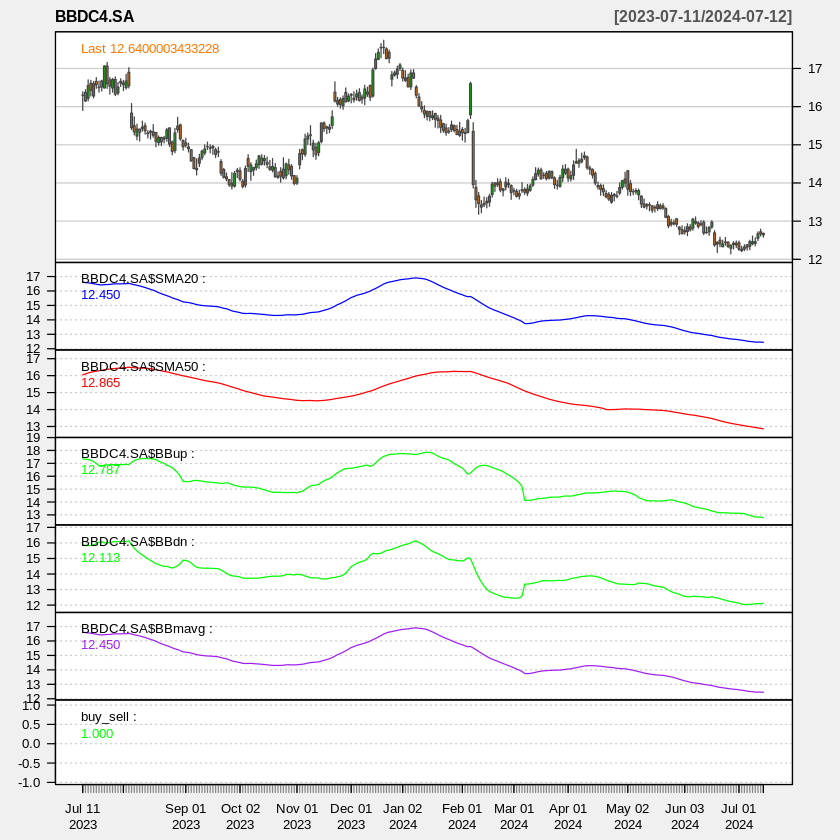

In [ ]:
# Obter dados da BBDC4.SA do Yahoo Finance para o período de 2023-01-01 até a data atual
getSymbols("BBDC4.SA", src = "yahoo", from = "2023-05-01", to = Sys.Date())

# Calcular as médias móveis de 20 e 50 períodos usando os preços de fechamento ajustados
BBDC4.SA$SMA20 <- SMA(Cl(BBDC4.SA), n = 20)
BBDC4.SA$SMA50 <- SMA(Cl(BBDC4.SA), n = 50)

# Calcular as Bandas de Bollinger usando os preços de fechamento ajustados
bbands <- BBands(Cl(BBDC4.SA), n = 20, maType = "SMA", sd = 2)

# Adicionar as Bandas de Bollinger ao data frame original
BBDC4.SA$BBup <- bbands$up
BBDC4.SA$BBdn <- bbands$dn
BBDC4.SA$BBmavg <- bbands$mavg

# Adicionando sugestões de compra e venda
# Se o preço cruzar acima da média móvel de 20 períodos e estiver abaixo da banda superior de Bollinger, é um sinal de compra
# Se o preço cruzar abaixo da média móvel de 20 períodos e estiver acima da banda inferior de Bollinger, é um sinal de venda
precos_ajustados <- Cl(BBDC4.SA)
signals <- rep(NA, length(precos_ajustados))
signals[precos_ajustados > BBDC4.SA$SMA20 & precos_ajustados < BBDC4.SA$BBup] <- 1  # Compra
signals[precos_ajustados < BBDC4.SA$SMA20 & precos_ajustados > BBDC4.SA$BBdn] <- -1  # Venda

# Criar um objeto de dados temporais correspondente aos momentos de compra e venda
buy_sell <- xts(rep(NA, length(precos_ajustados)), index(precos_ajustados))
buy_sell[signals == 1] <- 1  # Momentos de compra
buy_sell[signals == -1] <- -1  # Momentos de venda

# Plotar os preços ajustados, médias móveis e Bandas de Bollinger
chartSeries(BBDC4.SA, theme = chartTheme("white"),
            TA = c(addTA(BBDC4.SA$SMA20, col = "blue"),
                   addTA(BBDC4.SA$SMA50, col = "red"),
                   addTA(BBDC4.SA$BBup, col = "green"),
                   addTA(BBDC4.SA$BBdn, col = "green"),
                   addTA(BBDC4.SA$BBmavg, col = "purple"),
                   addTA(buy_sell, type = "p", col = ifelse(buy_sell == 1, "green", "red"), pch = 18)))

# Mostrar as primeiras e as últimas linhas dos dados com médias móveis e Bandas de Bollinger
head(BBDC4.SA)
tail(BBDC4.SA)
